Importing the Dependencies

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

Data Collection and Analysis

PIMA Diabetes Dataset

In [5]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv("C:\\Users\\suman\\OneDrive\\Desktop\\Assignments\\My Resume\\Final_Project\\diabetes.csv")

In [6]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
# number of Rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Removing Skin Thickness from dataset
diabetes_dataset = diabetes_dataset.drop(columns=["SkinThickness"])

In [ ]:
# Count the number of occurrences of each unique value in the 'Outcome' column 
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [10]:
# Calculate the mean of each column grouped by the 'Outcome' column
diabetes_dataset.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [11]:
# Calculate the percentage of diabetic (1) and non-diabetic (0) patients in the dataset
diabetes_dataset['Outcome'].value_counts()*100/len(diabetes_dataset)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

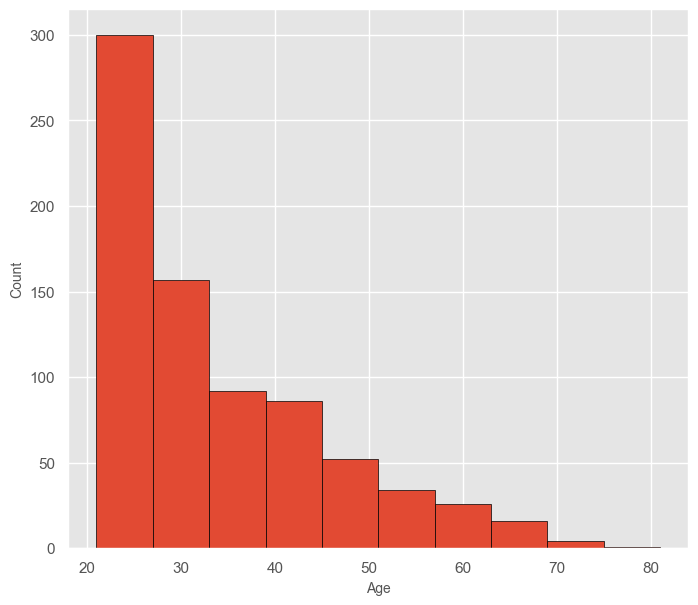

In [12]:
# Plot a histogram of the 'Age' column from the diabetes_dataset
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
diabetes_dataset['Age'].hist(edgecolor="black")

In [13]:
# Print the maximum and minimum age in the 'Age' column of the diabetes_dataset
print("MAX AGE: "+str(diabetes_dataset['Age'].max()))
print("MIN AGE: "+str(diabetes_dataset['Age'].min()))

MAX AGE: 81
MIN AGE: 21


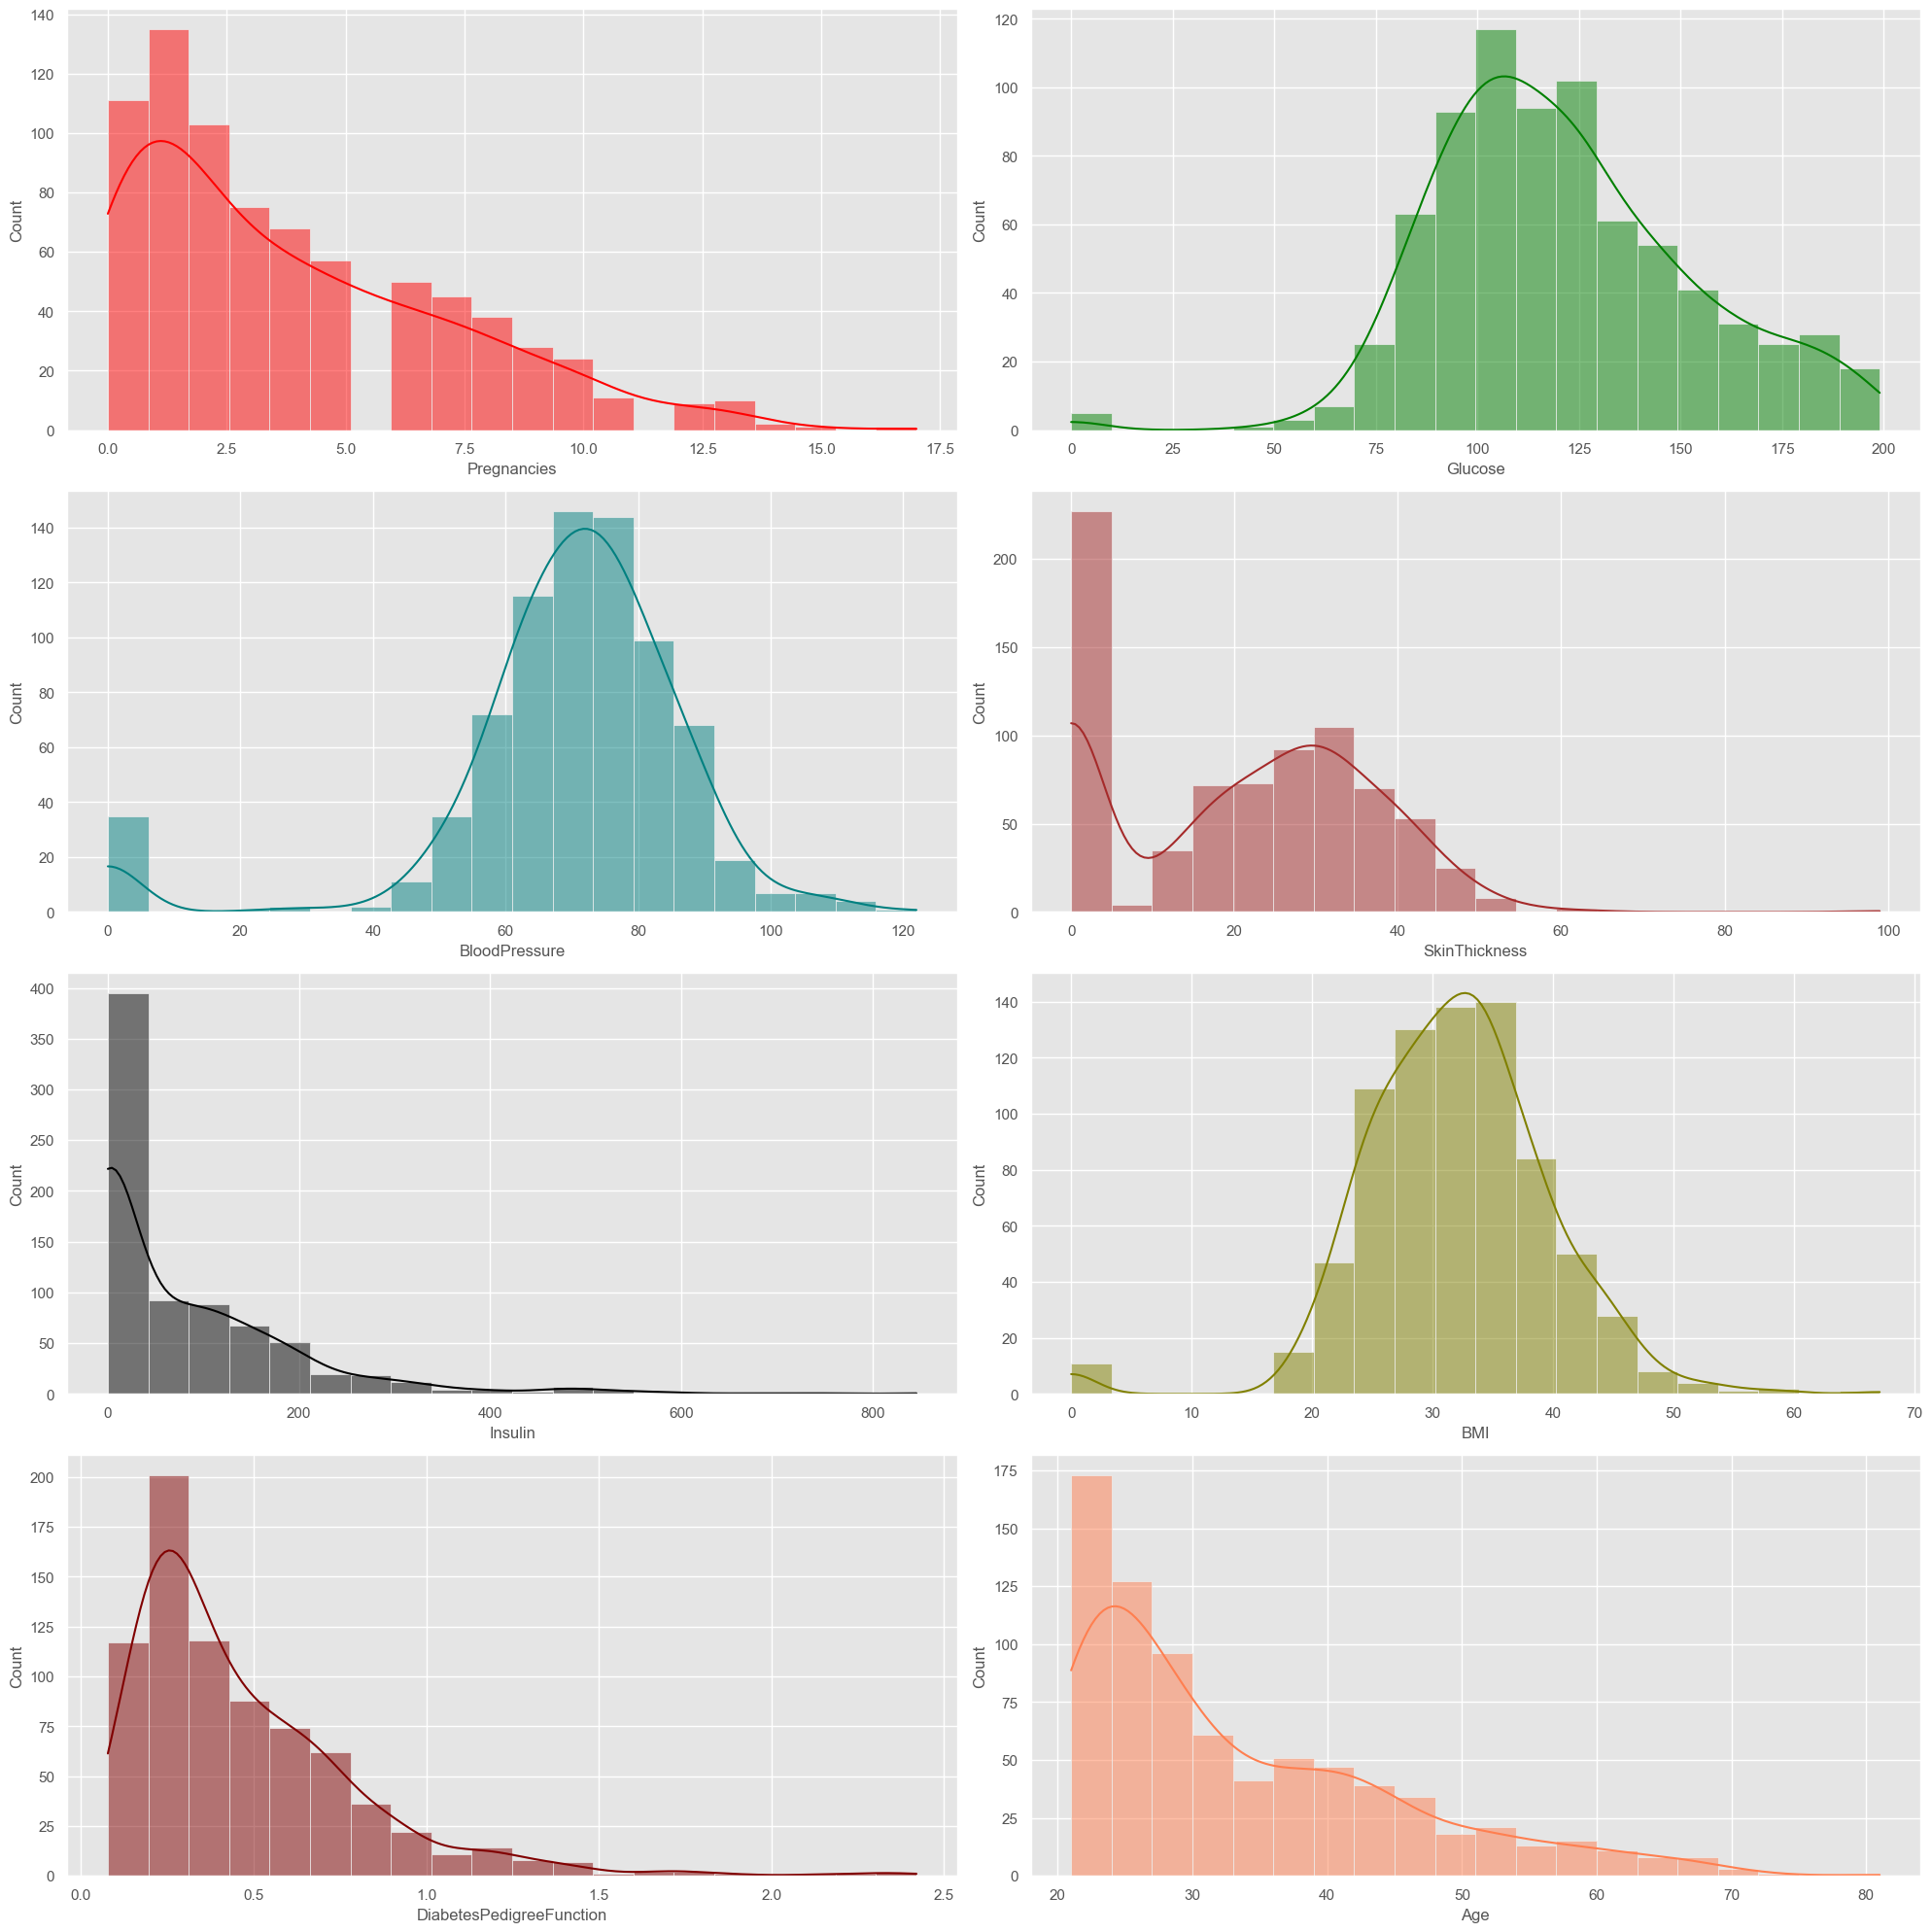

In [14]:
# Create a 4x2 grid of subplots with a figure size of 20x20 inches
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# Plotting the histogram of the 'Pregnancies' variable in the first subplot (top-left)
sns.histplot(data=diabetes_dataset, x='Pregnancies', bins=20, ax=ax[0, 0], color='red', kde=True)

# Plotting the histogram of the 'Glucose' variable in the second subplot (top-right)
sns.histplot(data=diabetes_dataset, x='Glucose', bins=20, ax=ax[0, 1], color='green', kde=True)

# Plotting the histogram of the 'BloodPressure' variable in the third subplot (middle-left)
sns.histplot(data=diabetes_dataset, x='BloodPressure', bins=20, ax=ax[1, 0], color='teal', kde=True)

# Plotting the histogram of the 'SkinThickness' variable in the fourth subplot (middle-right)
sns.histplot(data=diabetes_dataset, x='SkinThickness', bins=20, ax=ax[1, 1], color='brown', kde=True)

# Plotting the histogram of the 'Insulin' variable in the fifth subplot (bottom-left)
sns.histplot(data=diabetes_dataset, x='Insulin', bins=20, ax=ax[2, 0], color='black', kde=True)

# Plotting the histogram of the 'BMI' variable in the sixth subplot (bottom-right)
sns.histplot(data=diabetes_dataset, x='BMI', bins=20, ax=ax[2, 1], color='olive', kde=True)

# Plotting the histogram of the 'DiabetesPedigreeFunction' variable in the seventh subplot (bottom-left)
sns.histplot(data=diabetes_dataset, x='DiabetesPedigreeFunction', bins=20, ax=ax[3, 0], color='maroon', kde=True)

# Plotting the histogram of the 'Age' variable in the eighth subplot (bottom-right)
sns.histplot(data=diabetes_dataset, x='Age', bins=20, ax=ax[3, 1], color='coral', kde=True)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Group the dataset by the 'Outcome' column and calculate the mean number of pregnancies for each group
diabetes_dataset.groupby("Outcome").agg({'Pregnancies':'mean'})

Pregnancies
Outcome             
0           3.298000
1           4.865672

In [16]:
# Group the dataset by the 'Outcome' column and calculate the maximum number of pregnancies for each group
diabetes_dataset.groupby("Outcome").agg({'Pregnancies':'max'})

Pregnancies
Outcome             
0                 13
1                 17

In [ ]:
# Group the dataset by the 'Outcome' column and calculate the mean glucose level for each group
diabetes_dataset.groupby("Outcome").agg({'Glucose':'mean'})

In [ ]:
# Group the dataset by the 'Outcome' column and calculate the max glucose level for each group
diabetes_dataset.groupby("Outcome").agg({'Glucose':'max'})

In [70]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

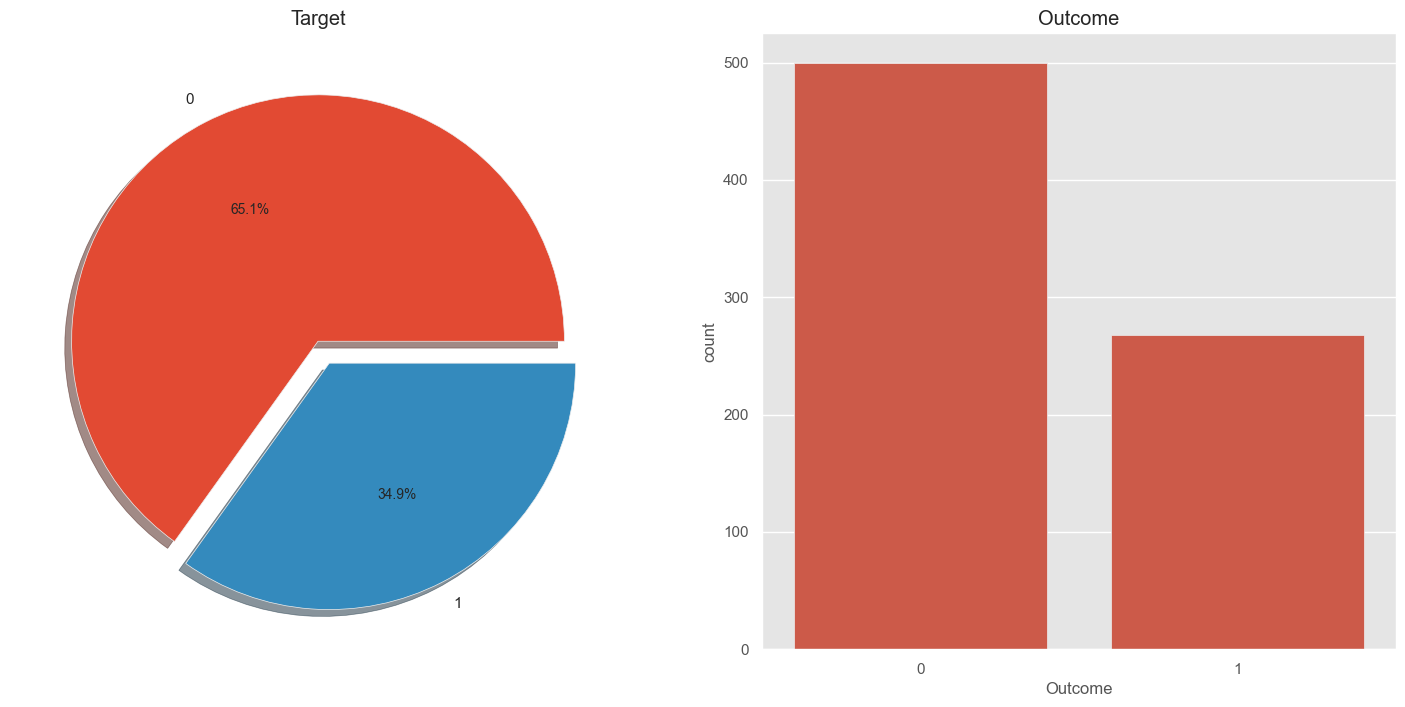

In [17]:
# Create a 1x2 grid of subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for the 'Outcome' column
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Count plot for the 'Outcome' column
sns.countplot(x='Outcome', data=diabetes_dataset, ax=ax[1])
ax[1].set_title('Outcome')

# Display the plots
plt.show()

In [19]:
# Calculate the correlation matrix for the diabetes_dataset
diabetes_dataset.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

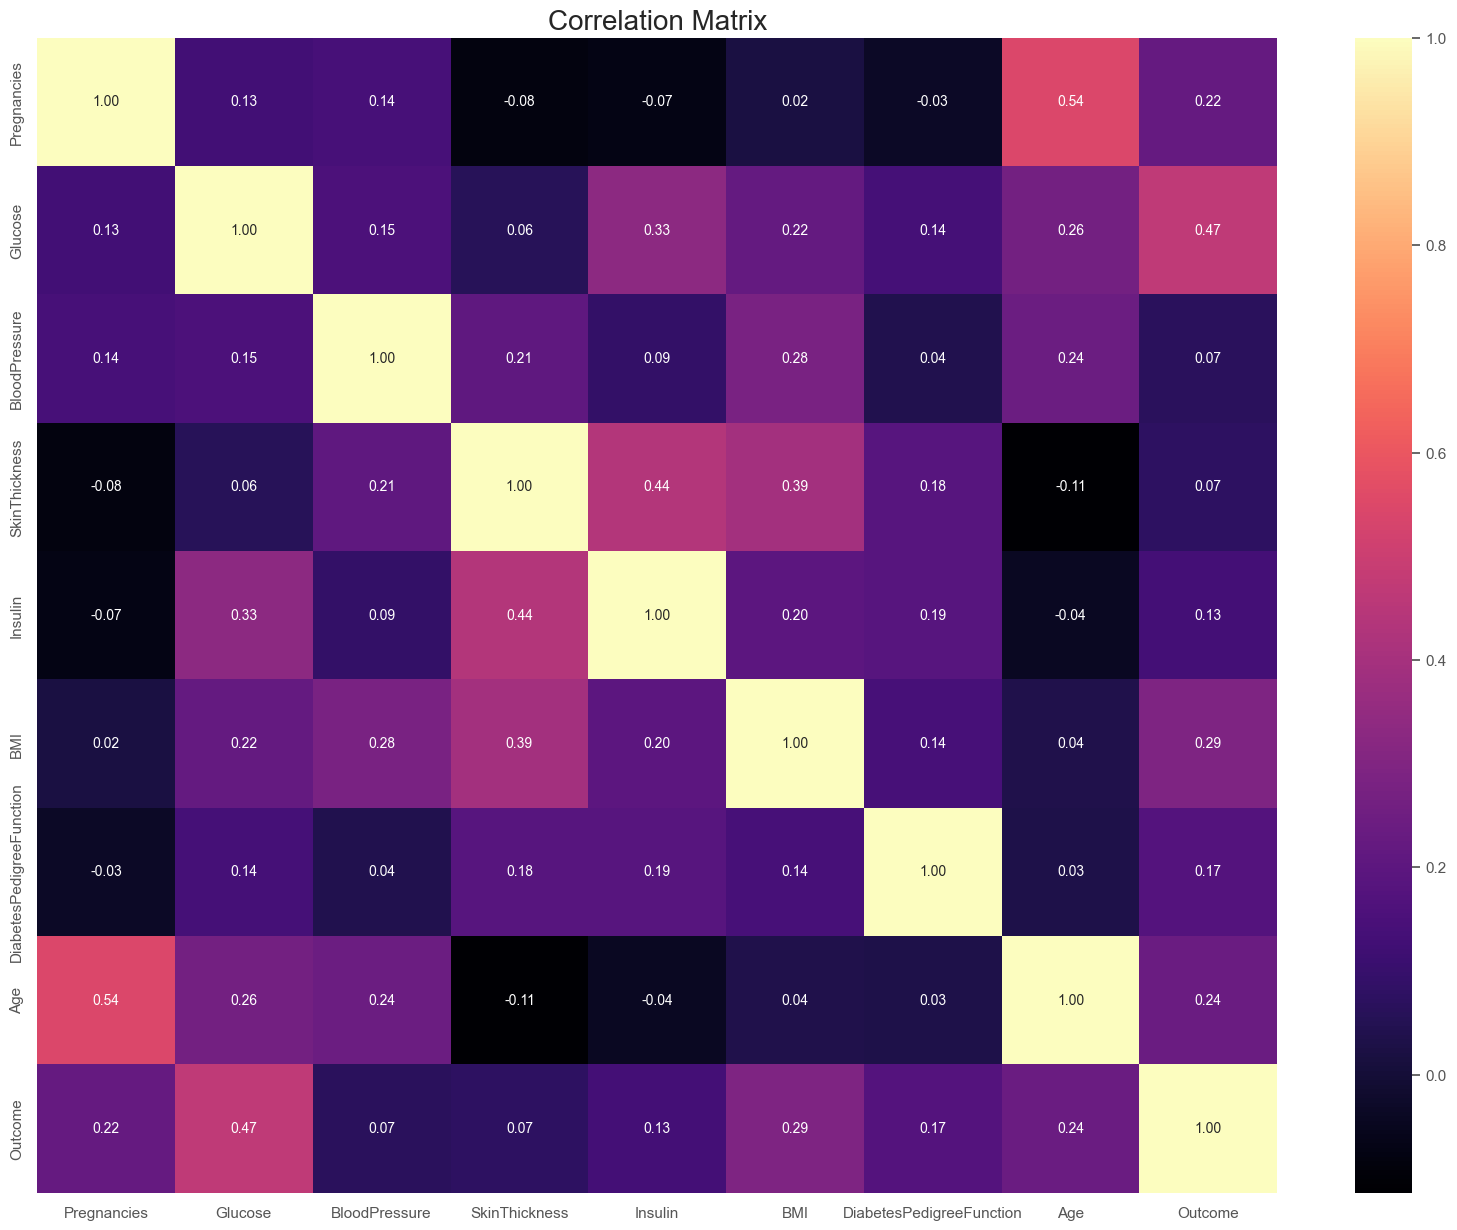

In [21]:
# Create a heatmap to visualize the correlation matrix of the diabetes_dataset
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(diabetes_dataset.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [24]:
# Replace all zero values with NaN in the specified columns of the diabetes_dataset
diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)


Data Preprocessing

In [26]:
# Calculate the number of missing values in each column of the diabetes_dataset
diabetes_dataset.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<Axes: >

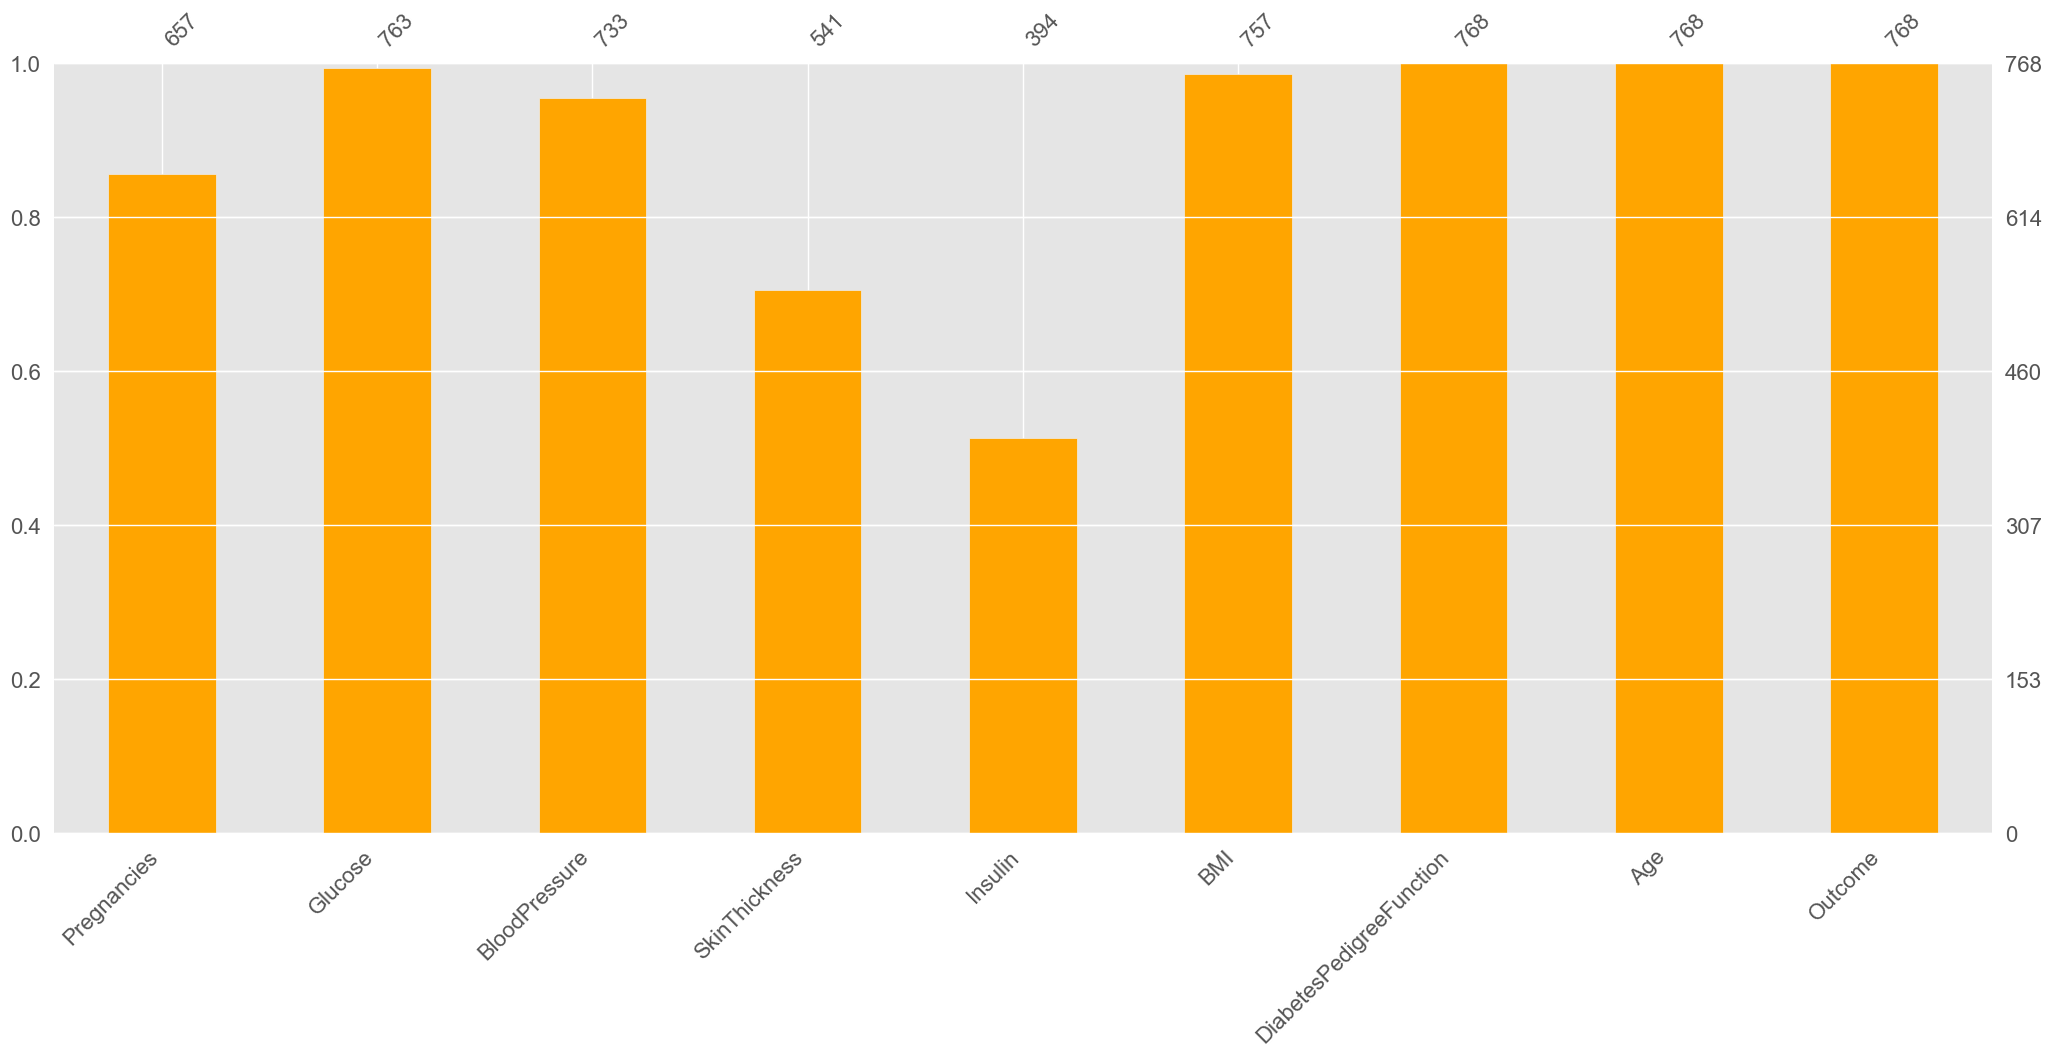

In [28]:
# Visualize the missing data in the diabetes_dataset using a bar chart
msno.bar(diabetes_dataset, color="orange")

In [30]:
# Function to calculate the median of a specified variable grouped by the 'Outcome' column
def median_target(var):   
    temp = diabetes_dataset[diabetes_dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [32]:
# Iterate over each column in the dataset (excluding 'Outcome')
columns = diabetes_dataset.columns
columns = columns.drop("Outcome")

for i in columns:
    # Calculate the median value of the column grouped by 'Outcome'
    median_target(i)
    
    # Replace NaN values in the column with the median value for non-diabetic patients (Outcome = 0)
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0) & (diabetes_dataset[i].isnull()), i] = median_target(i)[i][0]
    
    # Replace NaN values in the column with the median value for diabetic patients (Outcome = 1)
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1) & (diabetes_dataset[i].isnull()), i] = median_target(i)[i][1]


In [33]:
# Calculate the number of missing values in each column of the diabetes_dataset
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

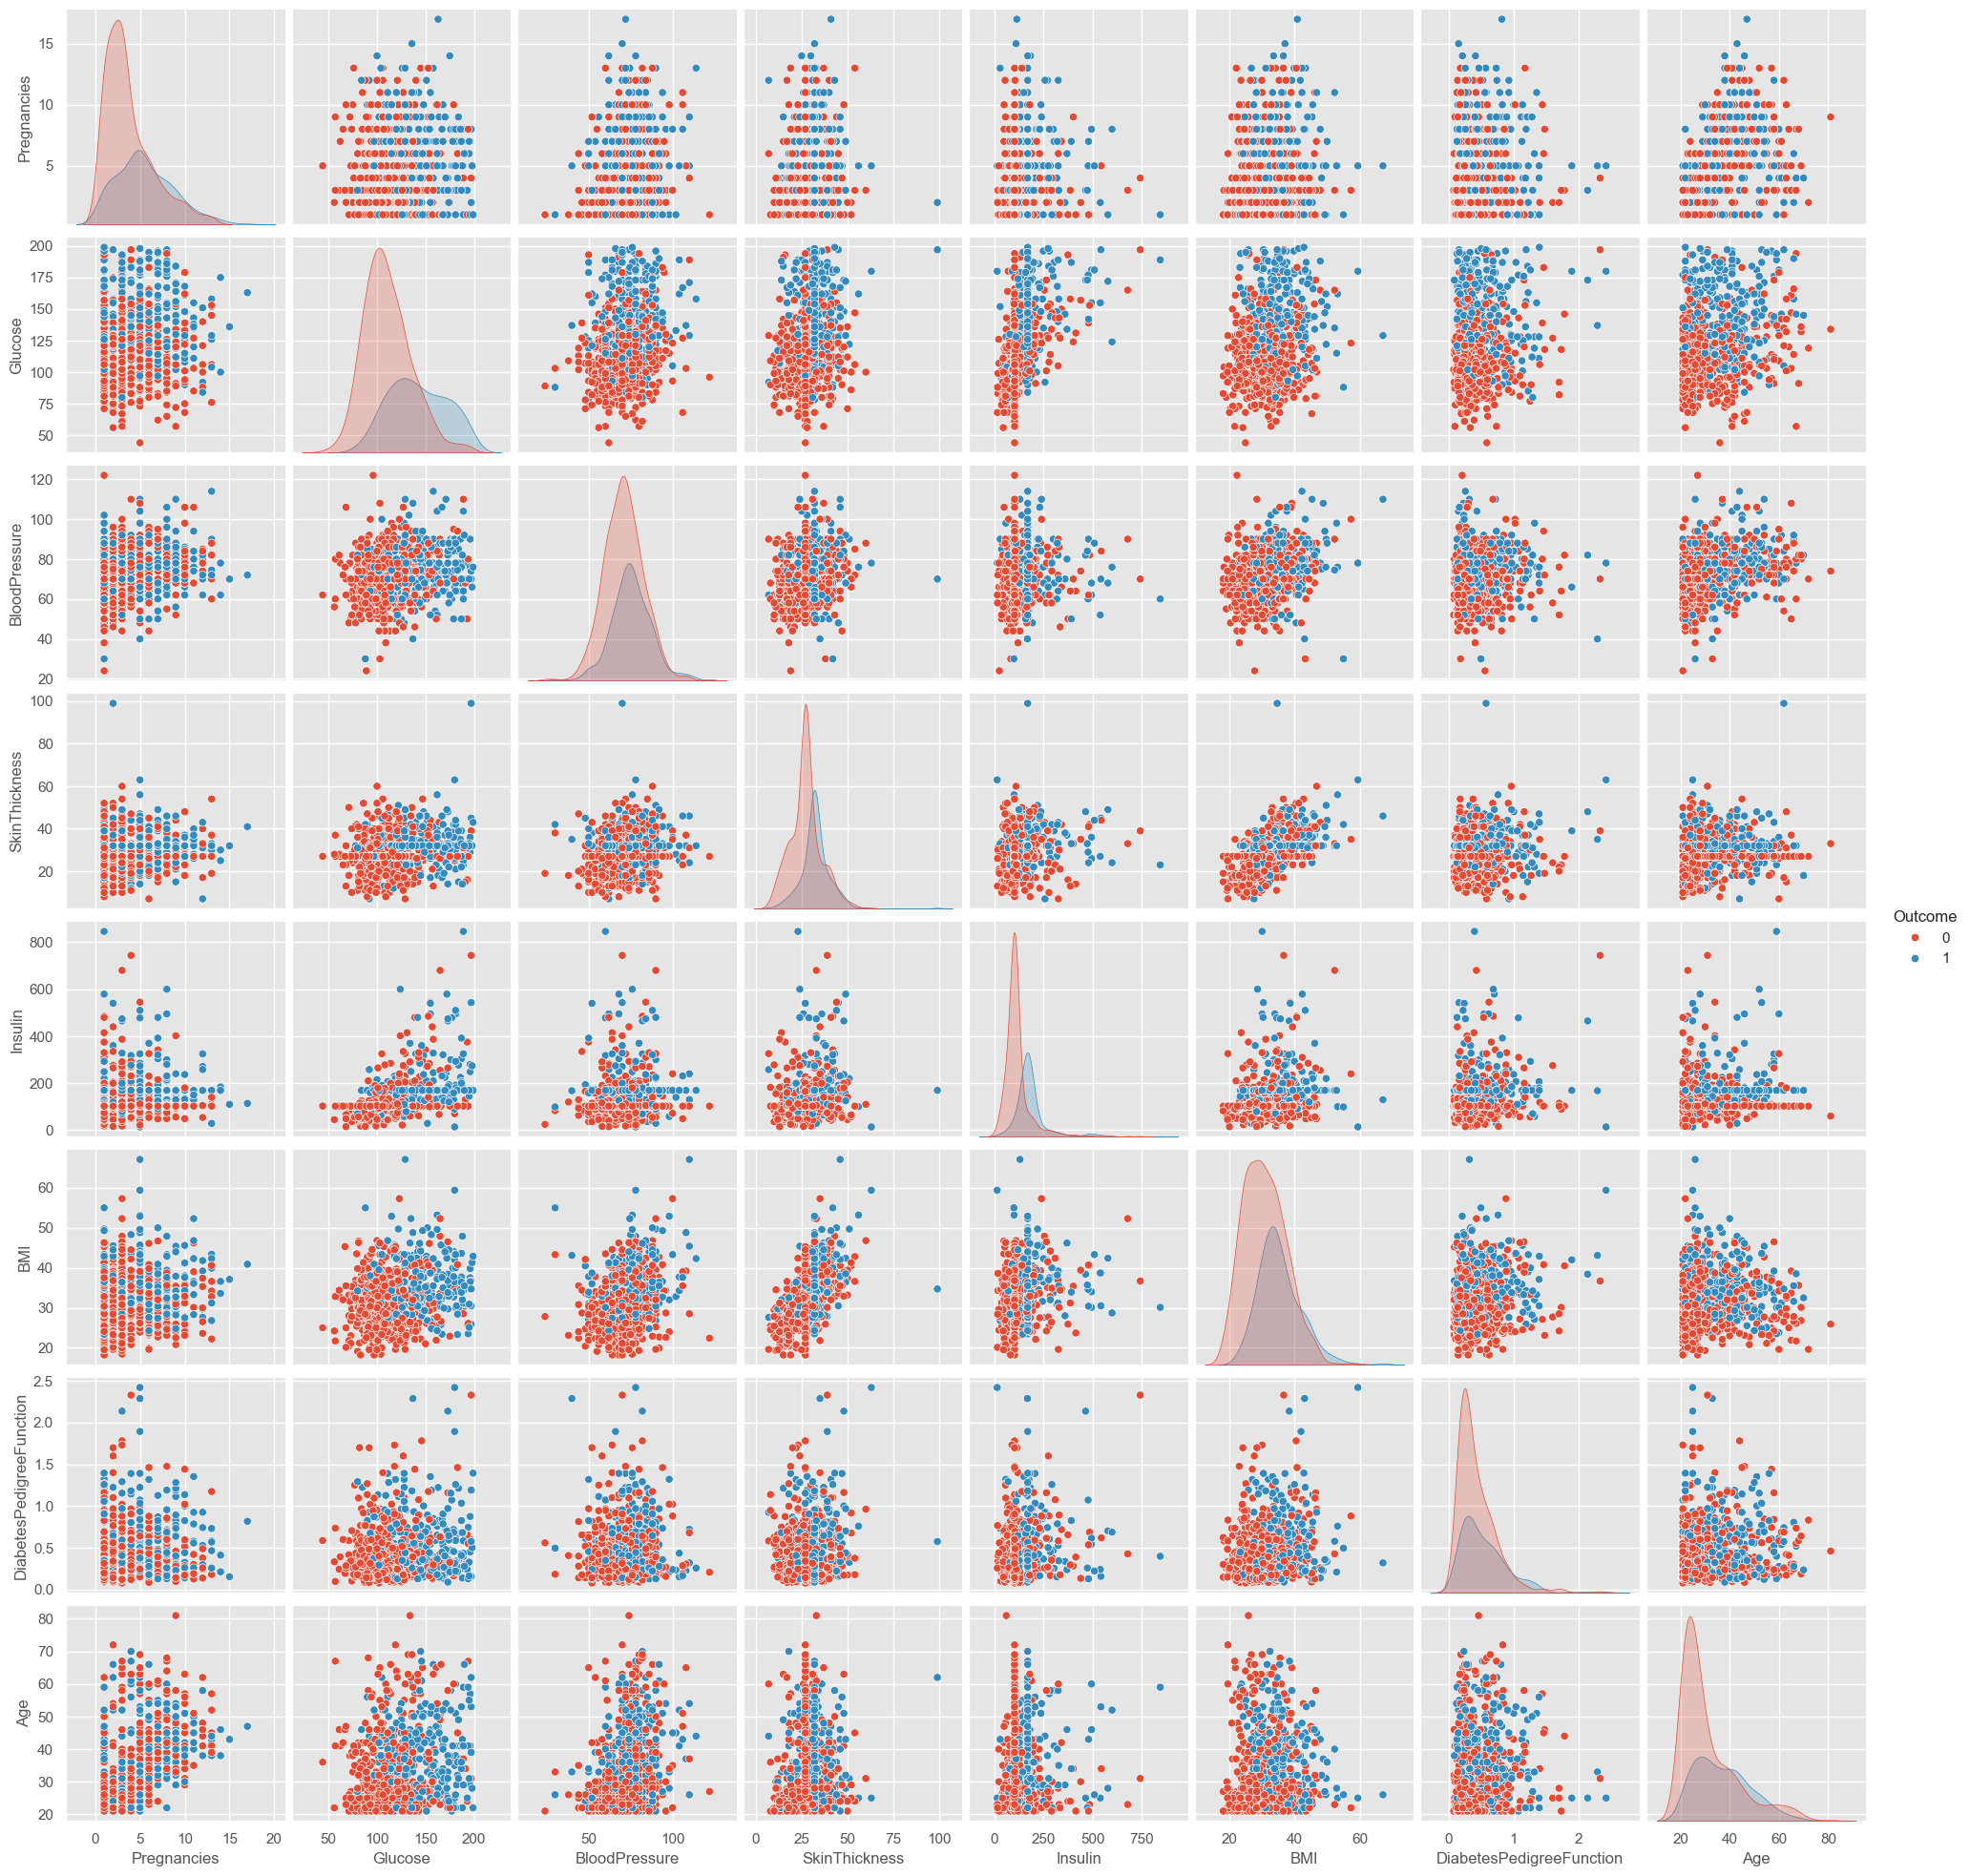

In [34]:
# Create a pair plot with hue based on 'Outcome'
p = sns.pairplot(diabetes_dataset, hue="Outcome")

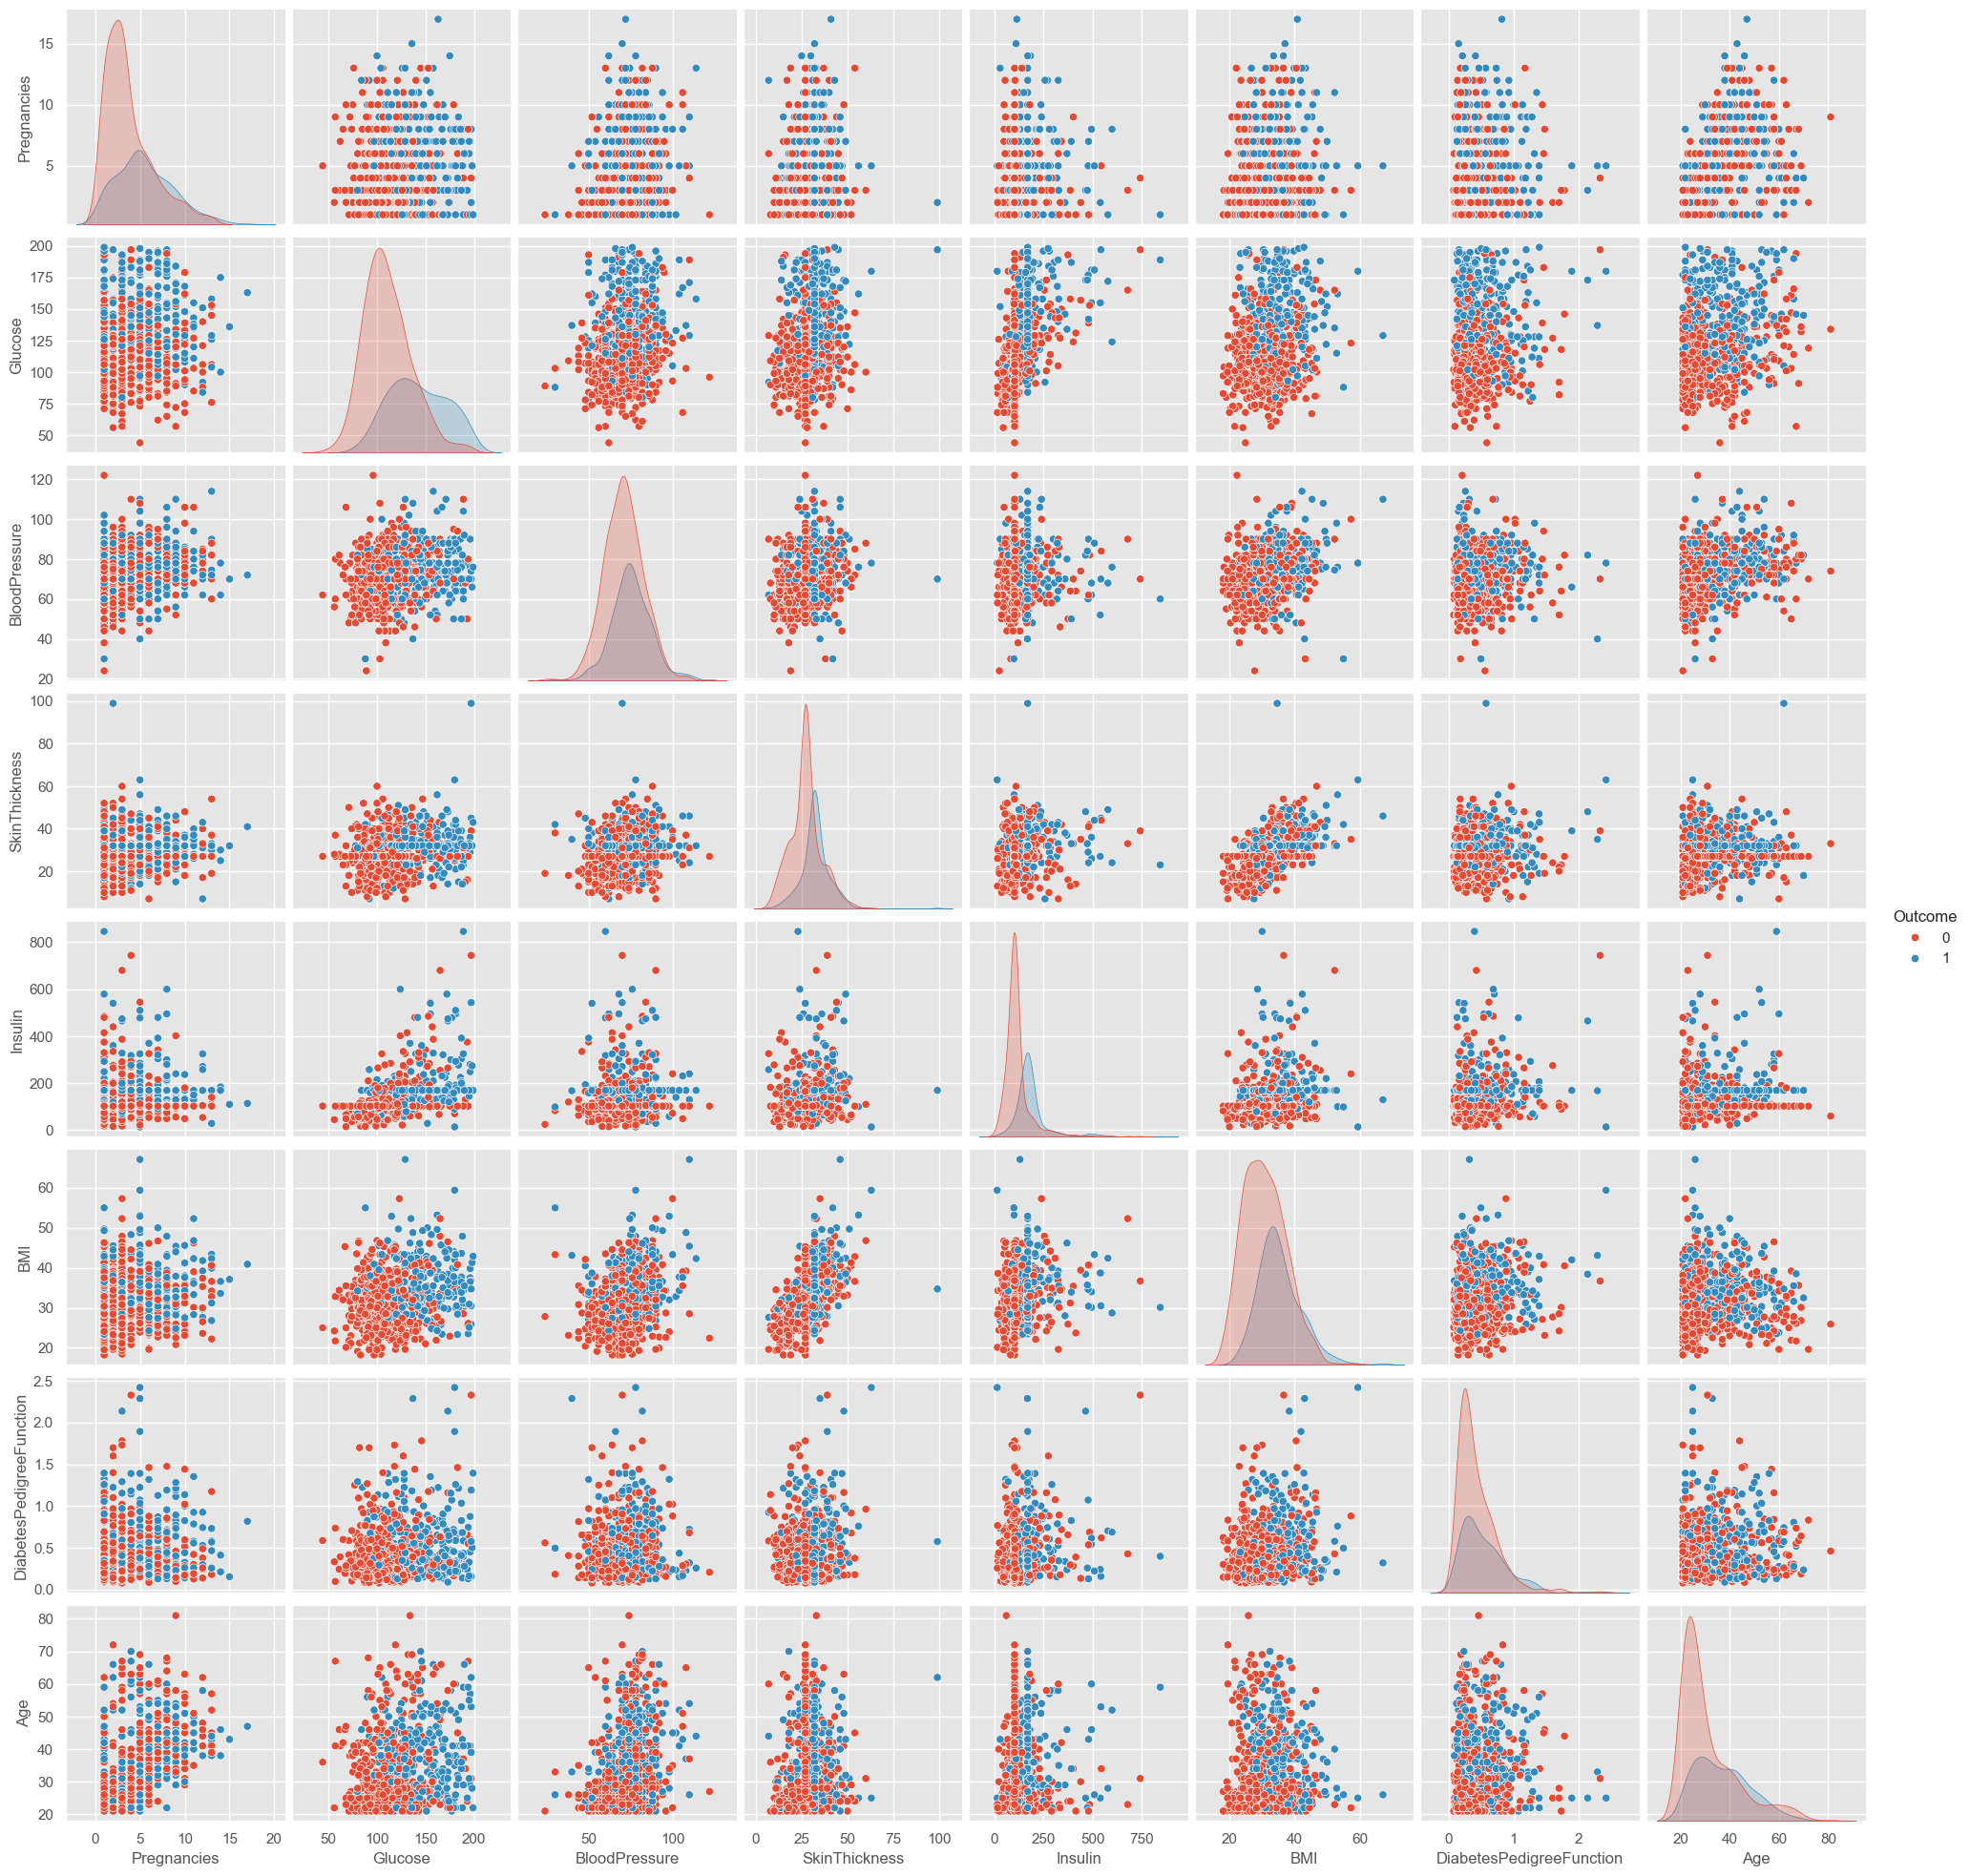

In [35]:
# Create a pair plot with hue based on 'Outcome'
p = sns.pairplot(diabetes_dataset, hue="Outcome")

<Axes: xlabel='Insulin'>

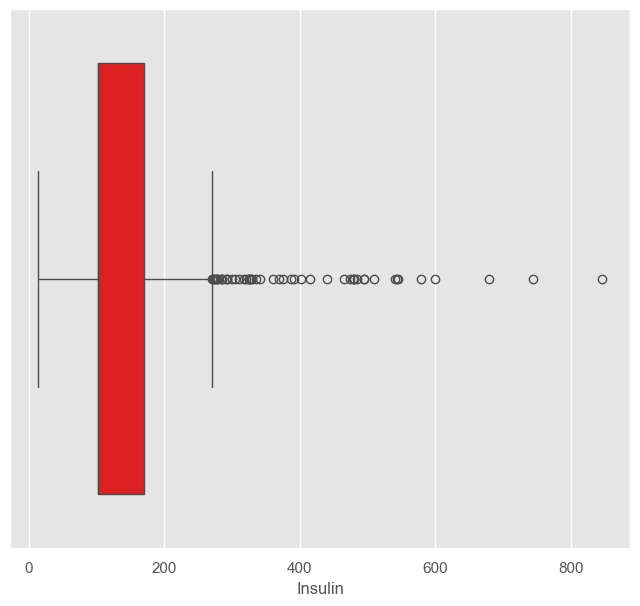

In [36]:
# Create a figure with a specified size of 8x7 inches
plt.figure(figsize=(8, 7))

# Generate a box plot for the 'Insulin' column in the diabetes_dataset
# The box plot is colored red
sns.boxplot(x=diabetes_dataset["Insulin"], color="red")

In [37]:
# Calculate the first quartile (Q1) for the 'Insulin' column
Q1 = diabetes_dataset.Insulin.quantile(0.25)

# Calculate the third quartile (Q3) for the 'Insulin' column
Q3 = diabetes_dataset.Insulin.quantile(0.75)

# Calculate the Interquartile Range (IQR) for the 'Insulin' column
IQR = Q3 - Q1

# Define the lower bound for outliers
lower = Q1 - 1.5 * IQR

# Define the upper bound for outliers
upper = Q3 + 1.5 * IQR

# Cap the values in the 'Insulin' column at the upper bound
# Any value greater than the upper bound is replaced with the upper bound value
diabetes_dataset.loc[diabetes_dataset['Insulin'] > upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

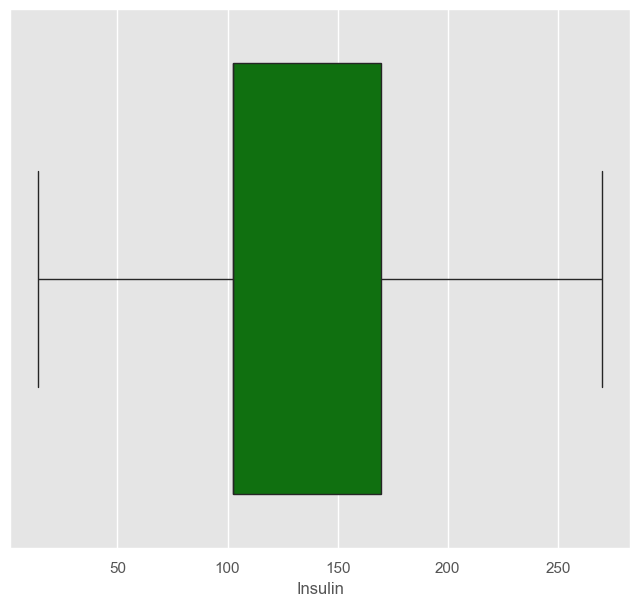

In [ ]:
# Create a figure with a specified size of 8x7 inches
plt.figure(figsize=(8, 7))

# Generate a box plot for the 'Insulin' column in the DataFrame df
sns.boxplot(x=diabetes_dataset["Insulin"], color="green")


In [41]:
# Initialize the LocalOutlierFactor model with 10 neighbors
lof = LocalOutlierFactor(n_neighbors=10)

# Fit the model to the DataFrame df and predict the outliers
# The fit_predict method returns -1 for outliers and 1 for inliers
lof.fit_predict(diabetes_dataset)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

<Axes: xlabel='Pregnancies'>

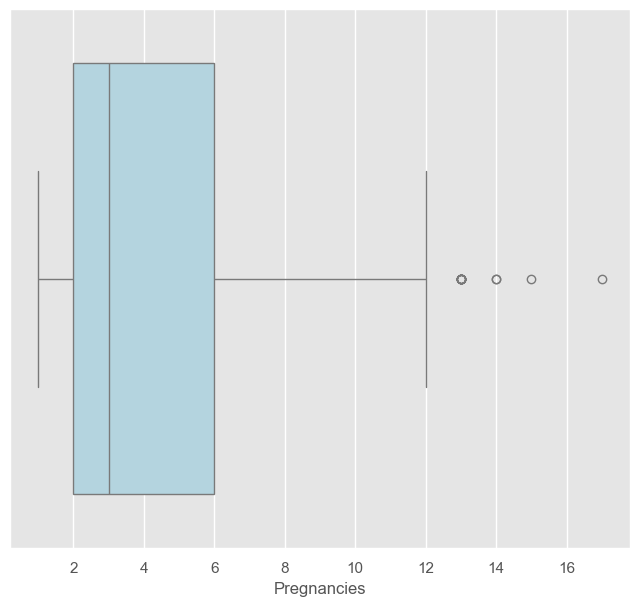

In [42]:
# Create a figure with a specified size of 8x7 inches
plt.figure(figsize=(8, 7))

# Generate a box plot for the 'Pregnancies' column in the DataFrame df
sns.boxplot(x=diabetes_dataset["Pregnancies"], color="lightblue")

In [43]:
# Calculate the negative outlier factor for each data point using the Local Outlier Factor model
df_scores = lof.negative_outlier_factor_

# Sort the negative outlier factor scores in ascending order and select the first 20 values
# These values represent the 20 most extreme outliers in the dataset
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [44]:
# Set the threshold for identifying outliers
# The threshold is chosen as the 8th smallest value in the sorted negative outlier factor scores
# This means the 8 most extreme outliers will be considered as outliers
threshold = np.sort(df_scores)[7]

In [45]:
print(threshold)

-1.7497423670960557


In [46]:
# Identify outliers based on the threshold
# Create a boolean array where True indicates an outlier (negative outlier factor score greater than the threshold)
outlier = df_scores > threshold

In [ ]:
# Filter the diabetes_dataset to include only the rows that are not considered outliers
diabetes_dataset = diabetes_dataset[outlier]

In [48]:
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [49]:
diabetes_dataset.shape

(760, 9)

<Axes: xlabel='Pregnancies'>

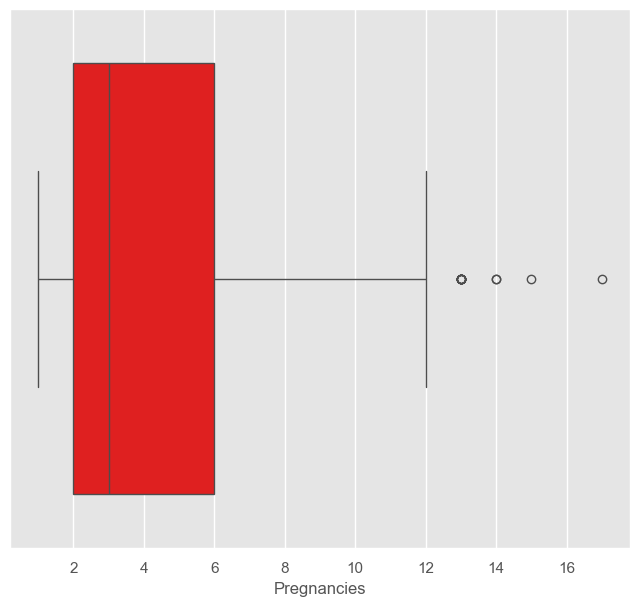

In [50]:
# Create a figure with a specified size of 8x7 inches
plt.figure(figsize=(8, 7))

# Generate a box plot for the 'Pregnancies' column in the DataFrame df
# The box plot is colored red for better visibility
sns.boxplot(x=diabetes_dataset["Pregnancies"], color="red")

Feature Enginnering

In [51]:
# Create a new categorical Series named 'NewBMI' with categories for different BMI ranges
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [52]:
# Assign the 'NewBMI' Series to a new column 'NewBMI' in the diabetes_dataset
diabetes_dataset['NewBMI'] = NewBMI

# Categorize the 'BMI' values into different BMI categories and assign them to the 'NewBMI' column
diabetes_dataset.loc[diabetes_dataset["BMI"] < 18.5, "NewBMI"] = NewBMI[0]  # Underweight
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 18.5) & (diabetes_dataset["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]  # Normal
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 24.9) & (diabetes_dataset["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]  # Overweight
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 29.9) & (diabetes_dataset["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]  # Obesity 1
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 34.9) & (diabetes_dataset["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]  # Obesity 2
diabetes_dataset.loc[diabetes_dataset["BMI"] > 39.9, "NewBMI"] = NewBMI[5]  # Obesity 3


In [53]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [54]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [55]:
# Assign a new column 'NewInsulinScore' to the diabetes_dataset by applying the set_insuline function to each row
diabetes_dataset = diabetes_dataset.assign(NewInsulinScore=diabetes_dataset.apply(set_insuline, axis=1))

In [56]:
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI NewInsulinScore  
0                     0.627   50        1   Obesity 1        Abnormal  
1                     0.351   31        0  Overweight          Normal  
2                     0.672   32        1      Normal        Abnormal  
3                     0.167   21        0  Overweight          Normal  
4                     2.288   33        1   Obesity 3        Abnormal

In [57]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
diabetes_dataset["NewGlucose"] = NewGlucose
diabetes_dataset.loc[diabetes_dataset["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes_dataset.loc[(diabetes_dataset["Glucose"] > 70) & (diabetes_dataset["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes_dataset.loc[(diabetes_dataset["Glucose"] > 99) & (diabetes_dataset["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes_dataset.loc[diabetes_dataset["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [58]:
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI NewInsulinScore  \
0                     0.627   50        1   Obesity 1        Abnormal   
1                     0.351   31        0  Overweight          Normal   
2                     0.672   32        1      Normal        Abnormal   
3                     0.167   21        0  Overweight          Normal   
4                     2.288   33        1   Obesity 3        Abnormal   

  NewGlucose  
0     Secret  
1     Normal  
2     Secret  
3     Normal  
4     Secret

In [59]:
# One hot encoding
diabetes_dataset = pd.get_dummies(diabetes_dataset, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [60]:
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1              True             False   
1                     0.351   31        0             False             False   
2                     0.672   32        1             False             False   
3                     0.167   21        0             False             False   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1             False               True               False   
2             False              False               False   
3             False               True               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                    True           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

In [61]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [62]:
# Create a new DataFrame 'categorical_df' containing only the specified categorical columns from the diabetes_dataset
categorical_df = diabetes_dataset[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]


In [63]:
categorical_df.head()

NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  NewBMI_Overweight  \
0              True             False             False              False   
1             False             False             False               True   
2             False             False             False              False   
3             False             False             False               True   
4             False             False              True              False   

   NewBMI_Underweight  NewInsulinScore_Normal  NewGlucose_Low  \
0               False                   False           False   
1               False                    True           False   
2               False                   False           False   
3               False                    True           False   
4               False                   False           False   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0              False                  False               True  
1               True                  False              False  
2              False                  False               True  
3               True                  False              False  
4              False                  False               True

In [94]:
# Separate the target variable 'Outcome' from the features
y = diabetes_dataset['Outcome']

# Select only the specified features for training
X = diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


In [95]:
# Store the column names and row labels of the feature set 'X' in the variables 'cols' and 'index'
cols = X.columns
index = X.index

In [96]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler and fit it to the feature set 'X'
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns=cols, index=index)


In [97]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

In [99]:
X.head()

Pregnancies  Glucose  BloodPressure   Insulin       BMI  \
0         0.75    0.775          0.000  1.000000  0.177778   
1        -0.50   -0.800         -0.375  0.000000 -0.600000   
2         1.25    1.650         -0.500  1.000000 -0.966667   
3        -0.50   -0.700         -0.375 -0.126866 -0.433333   
4         0.50    0.500         -2.000  0.977612  1.233333   

   DiabetesPedigreeFunction       Age  
0                  0.669707  1.235294  
1                 -0.049511  0.117647  
2                  0.786971  0.176471  
3                 -0.528990 -0.470588  
4                  4.998046  0.235294

In [100]:
# Initialize the Support Vector Classifier (SVC) with probability estimates
svc = SVC(probability=True)

# Define the parameter grid for hyperparameter tuning
parameter = {
    "gamma": [0.0001, 0.001, 0.01, 0.1],  # Range of values for the gamma parameter
    'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20]  # Range of values for the C parameter
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, parameter)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [101]:
# best_parameter
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [102]:
# Retrieve the best score from the grid search
# This score represents the highest mean cross-validated accuracy obtained during the grid search
grid_search.best_score_

np.float64(0.861807343178431)

In [103]:
# Initialize the Support Vector Classifier (SVC) with specified hyperparameters
svc = SVC(C=10, gamma=0.01, probability=True)

# Fit the SVC model to the training data
svc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = svc.predict(X_test)

# Print the accuracy score for the training data
print(accuracy_score(y_train, svc.predict(X_train)))

# Calculate and store the accuracy score for the test data
svc_acc = accuracy_score(y_test, svc.predict(X_test))

# Print the accuracy score for the test data
print(accuracy_score(y_test, svc.predict(X_test)))

# Print the confusion matrix for the test data predictions
print(confusion_matrix(y_test, y_pred))

# Print the classification report for the test data predictions
print(classification_report(y_test, y_pred))


0.8634868421052632
0.868421052631579
[[88 10]
 [10 44]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        98
           1       0.81      0.81      0.81        54

    accuracy                           0.87       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.87      0.87      0.87       152



Making a Predictive System

In [104]:
# Assuming 'scaler' is your fitted StandardScaler 
print(scaler.feature_names_in_)

['Pregnancies' 'Glucose' 'BloodPressure' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [106]:
# Input data for prediction (7 features)
input_data = (5, 166, 72, 175, 25.8, 0.587, 51)

# Make sure your columns match the ones used during model training
columns = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Convert input data to a DataFrame with correct column names
input_data_df = pd.DataFrame([input_data], columns=columns)

# Ensure the input data is scaled using the same scaler used during training
input_data_df = pd.DataFrame(scaler.transform(input_data_df), columns=scaler.feature_names_in_)

# Use the trained SVC model to predict
prediction = svc.predict(input_data_df)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[0]
The person is not diabetic


Saving the trained model

In [107]:
import pickle

In [108]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

NameError: name 'classifier' is not defined

In [84]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [85]:
input_data = (5,166,72,19,175,25.8,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\suman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [86]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
Insulin
BMI
DiabetesPedigreeFunction
Age
